## Exercise 3 (p.332, Chap.8), 5 (p.332, Chap.8), 8 (p.333, Chap.8), 9 (p.334, Chap.8) and 10 (p.334, Chap.8)

## Chapter 8 Exercise 3

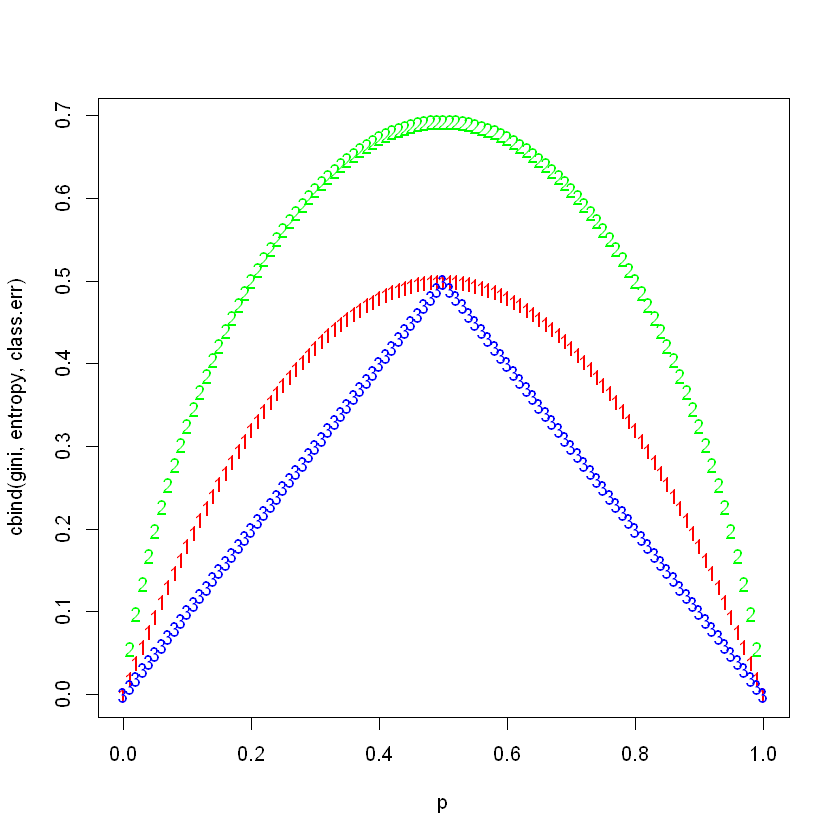

In [2]:
p = seq(0, 1, .01)
gini = p * (1-p) * 2
entropy = - (p * log(p) + (1-p) * log(1-p))
class.err = 1 - pmax(p, 1-p)
matplot(p, cbind(gini, entropy, class.err), col=c("red", "green", "blue"))

## Chapter 8: Exercise: 5

In [36]:
# a)
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [5]:
#majorty
sum(p>=0.5) > sum(p<0.5)  

# The number of red predictions is greater than the number of green predictions based on a 50% threshold, thus RED

[1] TRUE

In [7]:
# average
mean(p)

#The average of the probabilities is less than the 50% threshold, thus GREEN.

[1] 0.45

## Chapter 8: Exercise: 8

In [8]:
library(ISLR)
attach(Carseats)
set.seed(1)

In [9]:
train = sample(dim(Carseats)[1], dim(Carseats)[1] / 2)
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

[1] 4.922039

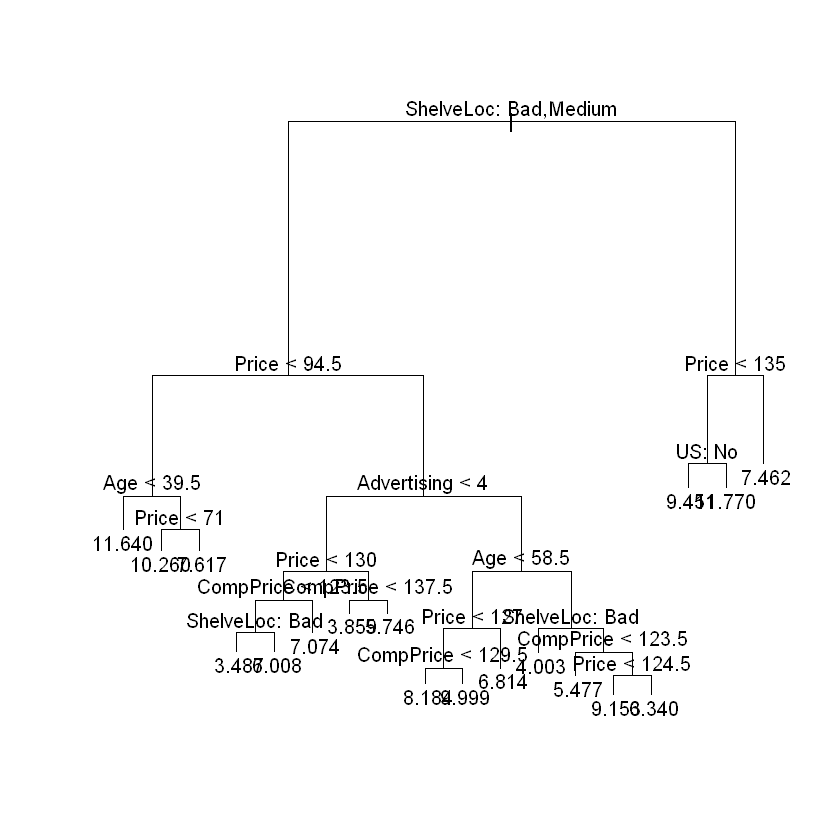

In [11]:
# b) 
library(tree)
tree.carseats = tree(Sales~., data=Carseats.train)
summary(tree.carseats)
plot(tree.carseats)
text(tree.carseats, pretty=0)
pred.carseats = predict(tree.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.carseats)^2)

#test MSE = 4.15.

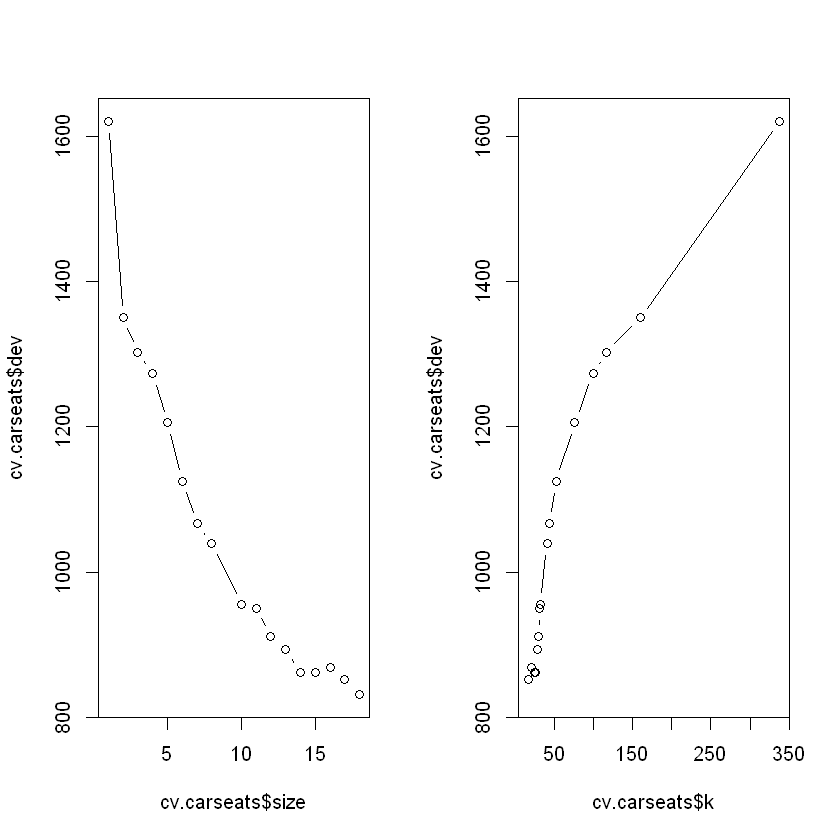

In [12]:
## c) 

cv.carseats = cv.tree(tree.carseats, FUN=prune.tree)
par(mfrow=c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type="b")
plot(cv.carseats$k, cv.carseats$dev, type="b")

[1] 4.918134

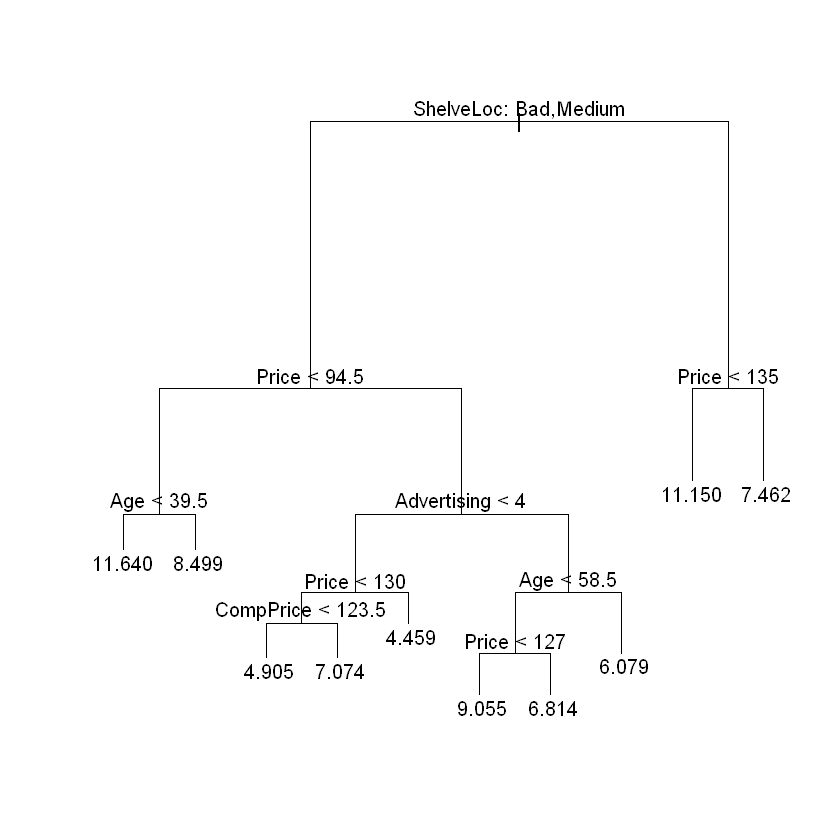

In [13]:
pruned.carseats = prune.tree(tree.carseats, best=9)
par(mfrow=c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty=0)
pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

In [14]:
# d) 
library(randomForest)
bag.carseats = randomForest(Sales~., data=Carseats.train, mtry=10, ntree=500, importance=T)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)
importance(bag.carseats)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



[1] 2.657296

,%IncMSE,IncNodePurity
CompPrice,23.07909904,171.185734
Income,2.82081527,94.079825
Advertising,11.43295625,99.098941
Population,-3.92119532,59.818905
Price,54.24314632,505.887016
ShelveLoc,46.26912996,361.962753
Age,14.24992212,159.740422
Education,-0.07662320,46.738585
Urban,0.08530119,8.453749
US,4.34349223,15.157608


In [15]:
# e)
rf.carseats = randomForest(Sales~., data=Carseats.train, mtry=5, ntree=500, importance=T)
rf.pred = predict(rf.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)
importance(rf.carseats)

[1] 2.701665

,%IncMSE,IncNodePurity
CompPrice,19.8160444,162.73603
Income,2.8940268,106.96093
Advertising,11.6799573,106.30923
Population,-1.6998805,79.04937
Price,46.3454015,448.33554
ShelveLoc,40.4412189,334.33610
Age,12.5440659,169.06125
Education,1.0762096,55.87510
Urban,0.5703583,13.21963
US,5.8799999,25.59797


## Chapter 8 Exercise 9

In [18]:
# a) 
library(ISLR)
attach(OJ)
set.seed(1013)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




In [19]:
#b) 
library(tree)
oj.tree = tree(Purchase~., data=OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "SalePriceMM"  
Number of terminal nodes:  7 
Residual mean deviance:  0.7564 = 599.8 / 793 
Misclassification error rate: 0.1612 = 129 / 800 

In [20]:
# c) 
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 344  407.30 MM ( 0.27907 0.72093 )  
     4) LoyalCH < 0.276142 163  121.40 MM ( 0.12270 0.87730 ) *
     5) LoyalCH > 0.276142 181  246.30 MM ( 0.41989 0.58011 )  
      10) PriceDiff < 0.065 75   75.06 MM ( 0.20000 0.80000 ) *
      11) PriceDiff > 0.065 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 456  366.30 CH ( 0.86184 0.13816 )  
     6) LoyalCH < 0.753545 189  224.30 CH ( 0.71958 0.28042 )  
      12) ListPriceDiff < 0.235 79  109.40 MM ( 0.48101 0.51899 )  
        24) SalePriceMM < 1.64 22   20.86 MM ( 0.18182 0.81818 ) *
        25) SalePriceMM > 1.64 57   76.88 CH ( 0.59649 0.40351 ) *
      13) ListPriceDiff > 0.235 110   75.81 CH ( 0.89091 0.10909 ) *
     7) LoyalCH > 0.753545 267   85.31 CH ( 0.96255 0.03745 ) *

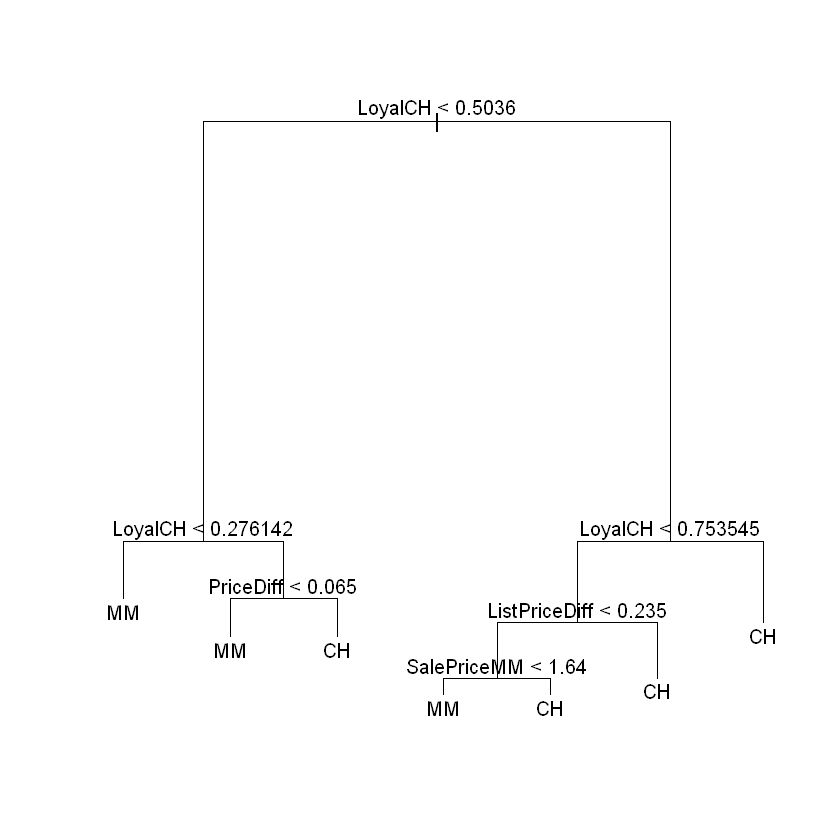

In [21]:
# d) 
plot(oj.tree)
text(oj.tree, pretty=0)

In [22]:
# e) 
oj.pred = predict(oj.tree, OJ.test, type="class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 149  15
  MM  30  76

In [23]:
#f) 
cv.oj = cv.tree(oj.tree, FUN=prune.tree)


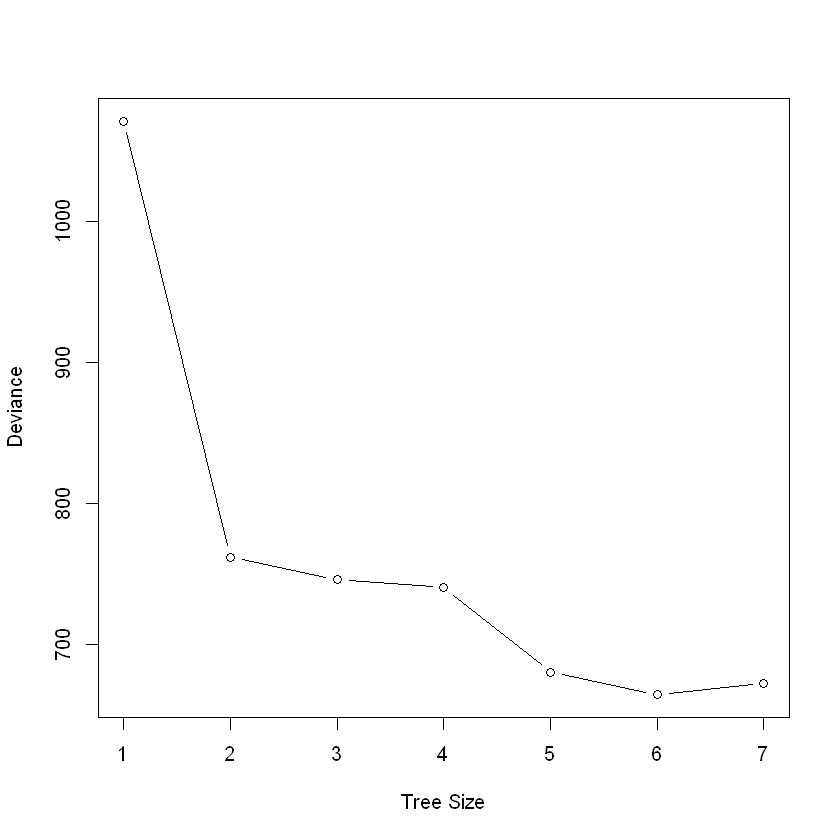

In [24]:
# g) 
plot(cv.oj$size, cv.oj$dev, type="b", xlab="Tree Size", ylab="Deviance")

In [25]:
# h) Size of 6 gives lowest cross-validation error.

In [26]:
# i)
oj.pruned = prune.tree(oj.tree, best=6)

In [27]:
# j)
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = 12L)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7701 = 611.5 / 794 
Misclassification error rate: 0.175 = 140 / 800 

In [28]:
# k)
pred.unpruned = predict(oj.tree, OJ.test, type="class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned / length(pred.unpruned)
pred.pruned = predict(oj.pruned, OJ.test, type="class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned / length(pred.pruned)

#Pruned and unpruned trees have same test error rate of 0.166.

[1] 0.1666667

[1] 0.2

## Chapter 8 Exercise 10

In [29]:
# a)
library(ISLR)
sum(is.na(Hitters$Salary))
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))
Hitters$Salary = log(Hitters$Salary)

[1] 59

[1] 0

In [30]:
# b) 
train = 1:200
Hitters.train = Hitters[train, ]
Hitters.test = Hitters[-train, ]

Loaded gbm 2.1.8



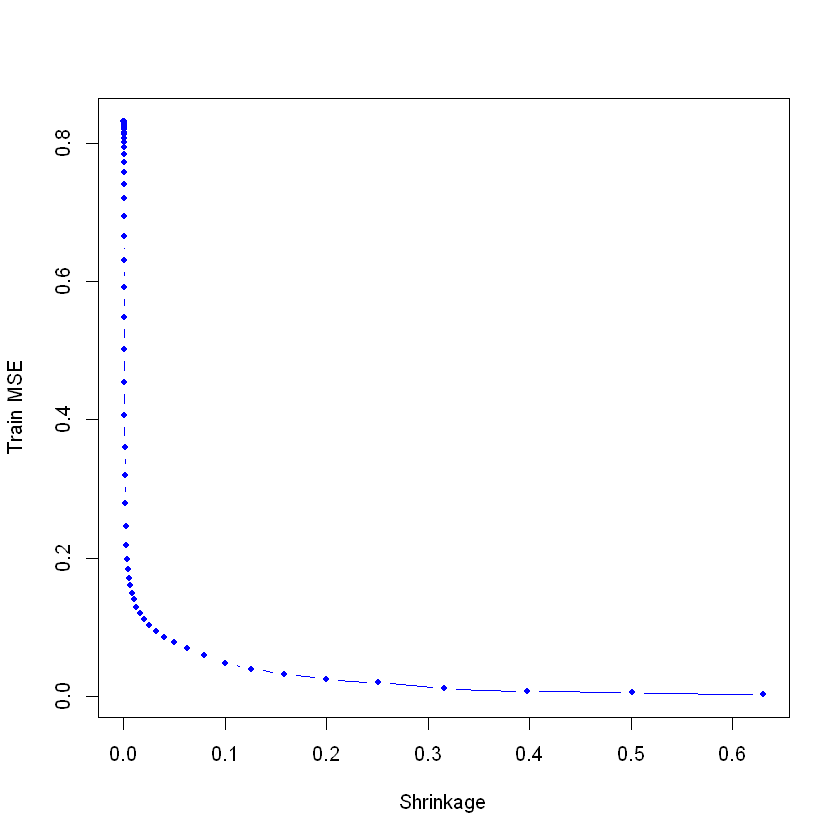

In [31]:
# c)
library(gbm)
set.seed(103)
pows = seq(-10, -0.2, by=0.1)
lambdas = 10 ^ pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
  boost.hitters = gbm(Salary~., data=Hitters.train, distribution="gaussian", n.trees=1000, shrinkage=lambdas[i])
  train.pred = predict(boost.hitters, Hitters.train, n.trees=1000)
  test.pred = predict(boost.hitters, Hitters.test, n.trees=1000)
  train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
  test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}
plot(lambdas, train.errors, type="b", xlab="Shrinkage", ylab="Train MSE", col="blue", pch=20)

[1] 0.2560507

[1] 0.05011872

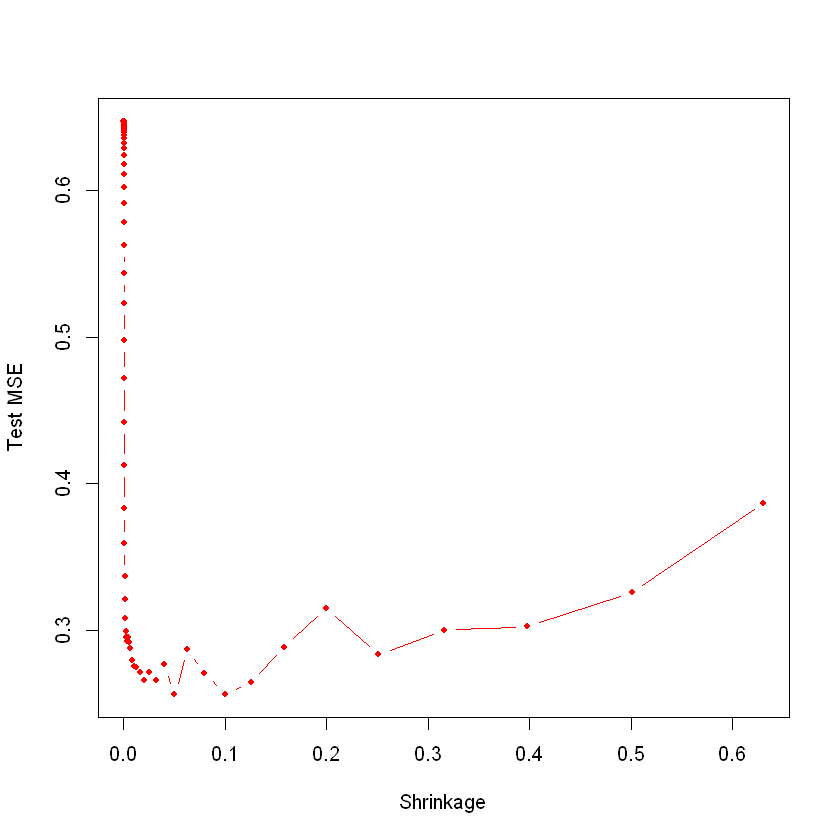

In [32]:
# d)
plot(lambdas, test.errors, type="b", xlab="Shrinkage", ylab="Test MSE", col="red", pch=20)
min(test.errors)
lambdas[which.min(test.errors)]

#Minimum test error is obtained at lambda = 0.05011.

In [33]:
# e)
lm.fit = lm(Salary~., data=Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)
library(glmnet)
set.seed(134)
x = model.matrix(Salary~., data=Hitters.train)
y = Hitters.train$Salary
x.test = model.matrix(Salary~., data=Hitters.test)
lasso.fit = glmnet(x, y, alpha=1)
lasso.pred = predict(lasso.fit, s=0.01, newx=x.test)
mean((Hitters.test$Salary - lasso.pred)^2)

#Both linear model and regularization have higher test MSE than boosting

[1] 0.4917959

Loading required package: Matrix

Loaded glmnet 4.1-2



[1] 0.4700537

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,22.7562681
CWalks,CWalks,10.4279674
CHits,CHits,8.6198109
PutOuts,PutOuts,6.6159325
Years,Years,6.4611683
Walks,Walks,6.2331148
CRBI,CRBI,6.0926744
CHmRun,CHmRun,5.1076104
RBI,RBI,4.5321678


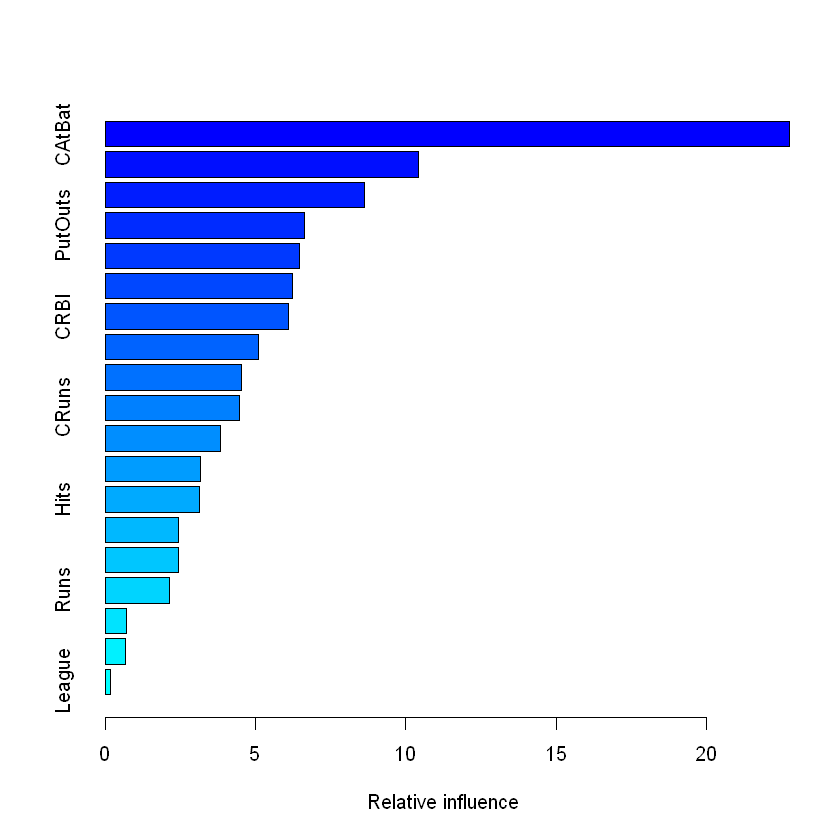

In [34]:
# f)
boost.best = gbm(Salary~., data=Hitters.train, distribution="gaussian", n.trees=1000, shrinkage=lambdas[which.min(test.errors)])
summary(boost.best)

In [35]:
# g)
library(randomForest)
set.seed(21)
rf.hitters = randomForest(Salary~., data=Hitters.train, ntree=500, mtry=19)
rf.pred = predict(rf.hitters, Hitters.test)
mean((Hitters.test$Salary - rf.pred)^2)

#Test MSE for bagging is about 0.2303. which is a bit lower than the best test MSE for boosting

[1] 0.2303919